## Problem 1.4

In [28]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
import numpy as np

In [33]:
plt.style.use('openstax')

### 1.4.1: Generating the graph

In [59]:
# create an empty undirected graph
G = nx.Graph()

with open('primaryschool.csv') as f:
    reader = csv.reader(f, delimiter='\t')

    for row in reader:
        # interpret each data point
        t, i, j, c_i, c_j = row
        t, i, j = map(int, [t, i, j])

        if not G.has_node(i):
            G.add_node(i, c=c_i)

        if not G.has_node(j):
            G.add_node(j, c=c_j)
        
        # add the edge described by this row to the graph,
        #   or modify its weight if already present
        if G.has_edge(i, j):
            G[i][j]['weight'] += 1
        else:
            # weight = count of this pair's interactions
            G.add_edge(i, j, weight=1)

print('Nodes: {}; Edges: {}'.format(len(G.nodes), len(G.edges)))

Nodes: 242; Edges: 8317


### 1.4.2: Descriptive analysis

In [53]:
def analyze(data, name):
    plt.hist(data, bins=20)
    plt.title('{} distribution of school interactions graph'.format(name.capitalize()))
    plt.xlabel(name.capitalize())
    plt.ylabel('Frequency')
    print('Average {} of G: {}'.format(name, np.mean(data)))

Average degree of G: 68.73553719008264


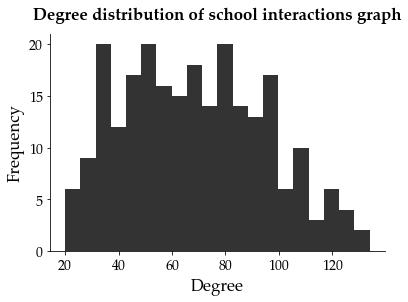

In [54]:
degrees = [G.degree(u) for u in G.nodes]
analyze(degrees, 'degree')

Average clustering coefficient of G: 0.5255415410620273


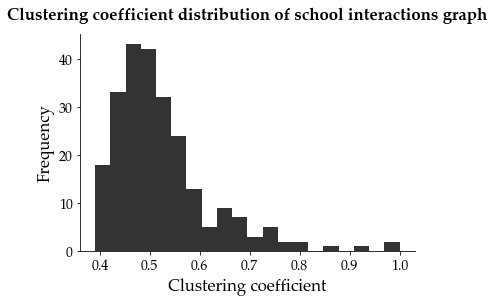

In [58]:
clustering_coeffs = list(nx.algorithms.cluster.clustering(G).values())
analyze(clustering_coeffs, 'clustering coefficient')

Average betweenness centrality of G: 0.00305187865070928


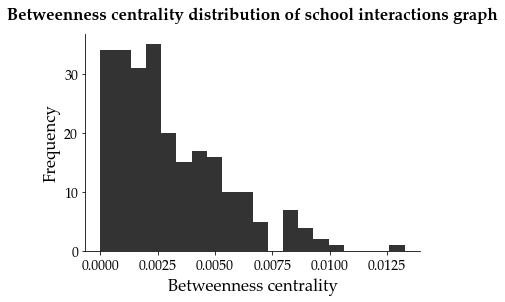

In [56]:
betweenness = list(nx.algorithms.centrality.betweenness_centrality(G).values())
analyze(betweenness, 'betweenness centrality')

### Problem 1.4.3: Plotting the graph

In [111]:
node_classes = [G.nodes[n]['c'] for n in G.nodes]
_, class_counts = np.unique(node_classes, return_counts=True)

colors = ['red', 'orange', 'green', 'blue', 'purple', 'pink', 'brown', 'cyan', 'gray', 'olive', 'skyblue']
class_id_map = {cl: i for i, cl in enumerate(set(node_classes))}

node_colors = [colors[class_id_map[c]] for c in node_classes]

In [ ]:
node_sizes = [G.degree(u) for u in G.nodes]

Color key:
1A: blue, 23 members
1B: skyblue, 25 members
2A: gray, 23 members
2B: cyan, 26 members
3A: purple, 23 members
3B: red, 22 members
4A: green, 21 members
4B: orange, 23 members
5A: pink, 22 members
5B: olive, 24 members
Teachers: brown, 10 members


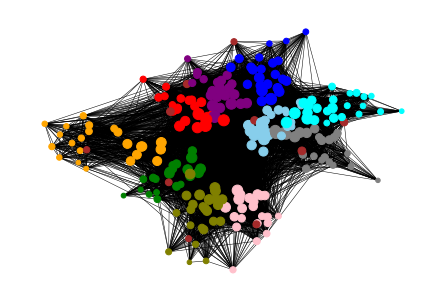

In [118]:
nx.draw(
    G, 
    pos=nx.spring_layout(G),
    node_size=node_sizes, 
    node_color=node_colors,
    width=0.5)

print('Color key:')
[print(cl + ': ' + colors[i] + ', {} members'.format(ct)) for (cl, i), ct in zip(sorted(class_id_map.items()), class_counts)];